https://www.kaggle.com/ilialar/ubiquant-eda-and-baseline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This notebook contains an initial EDA of train dataset for the Ubiquant Market Prediction competition as well as a simple baseline model training and inference. Here I analyze the overall structure of the dataset, the distributions of different features, and the correlation of features and target.


In [2]:
# 用的是code1的数据和方法
train_df = pd.read_parquet("../train_low_mem.parquet")

In [3]:
train_df.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [4]:
train_df.shape

(3141410, 304)

## 1. EDA

### 1.1 探索target

<AxesSubplot:>

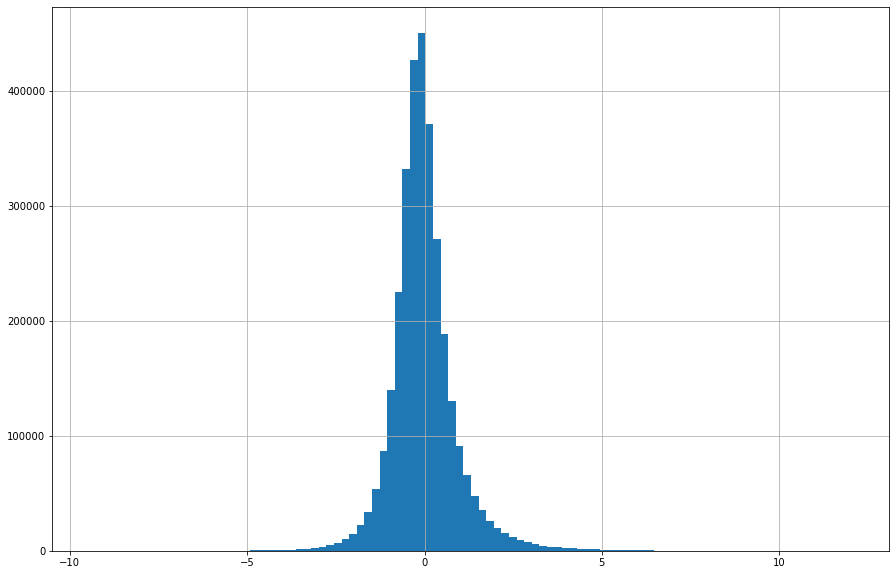

In [5]:
train_df['target'].hist(bins=100, figsize=(15, 10))

The target values look quite normal without any outliers or long tails. We should not have any problems working with it. Let's also plot distributions of targets of a few random features:  
（虽然所有的target类似正态分布，还不错，但是我们要验证一下，是不是对于每个investment_id，也是正态分布。所以，随机选十个investment_id，看一下分布

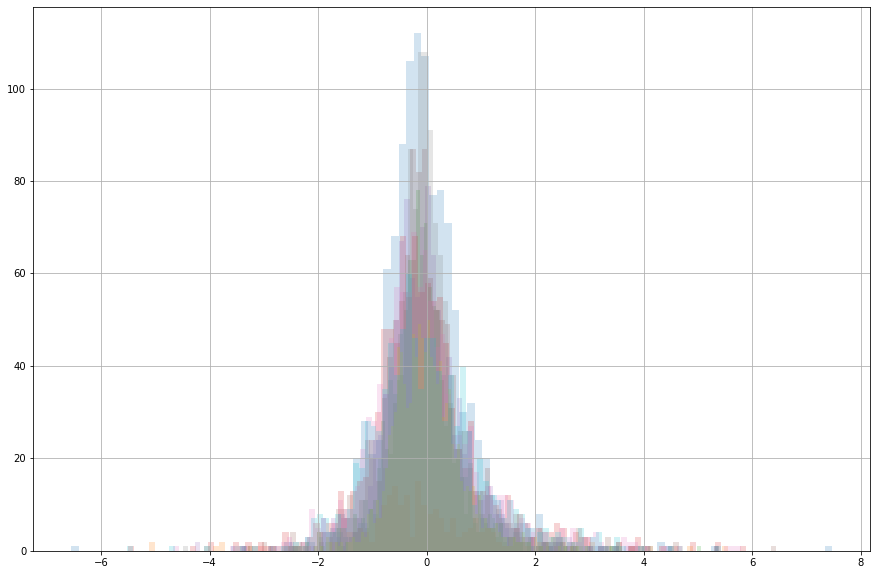

In [6]:
for f in np.random.choice(train_df['investment_id'].unique(), 10):
    train_df[train_df['investment_id'] == f]['target'].hist(bins=100, alpha = 0.2, figsize=(15, 10))
    # alpha 是不透明度

On a high-level target for each investment_id also looks ok.

### 1.2 探索investment_id

In [7]:
train_df['investment_id'].nunique()  # 唯一的个数

3579

In [8]:
train_df['investment_id'].unique().__len__()

3579

<AxesSubplot:>

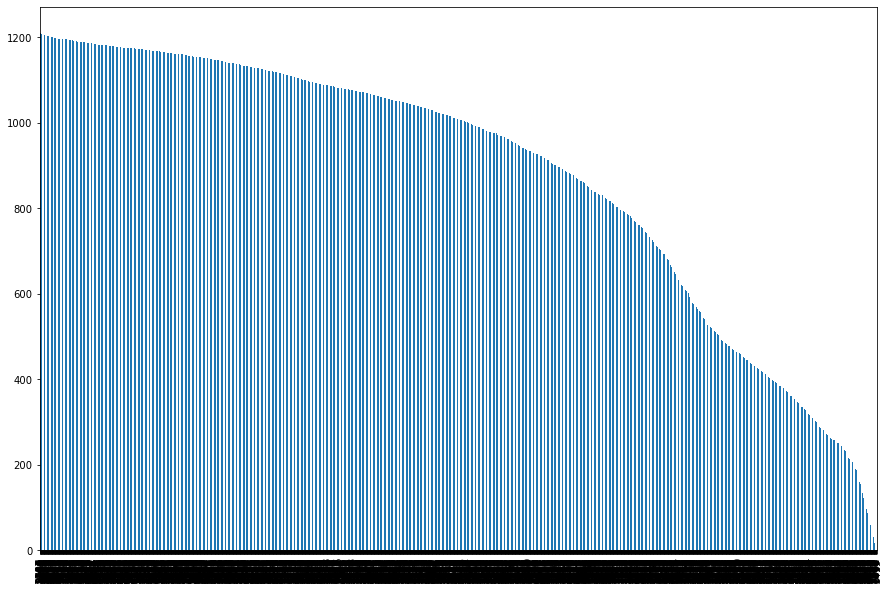

In [9]:
train_df['investment_id'].value_counts().plot(kind = 'bar', figsize = (15, 10))

### 1.3 探索Features

It is hard to analyze all features one by one, but let's do so aggregated analysis. First of all, let's just look at some features distributions.

<AxesSubplot:>

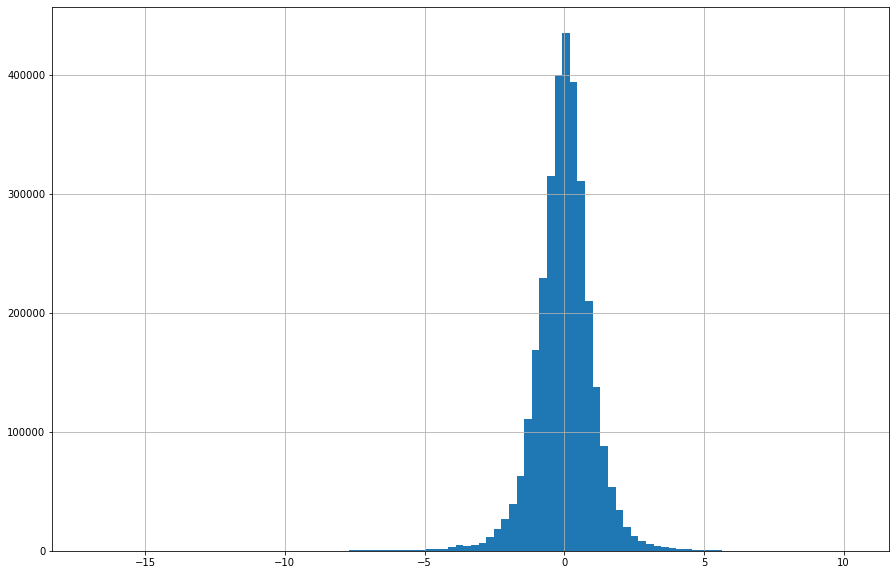

In [10]:
f = 'f_67'
train_df[f].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

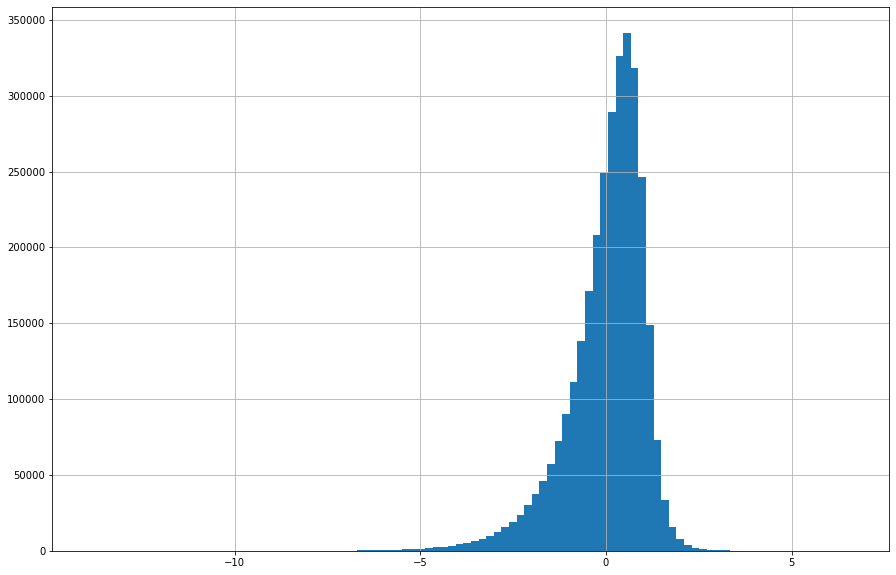

In [11]:
f = 'f_109'
train_df[f].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

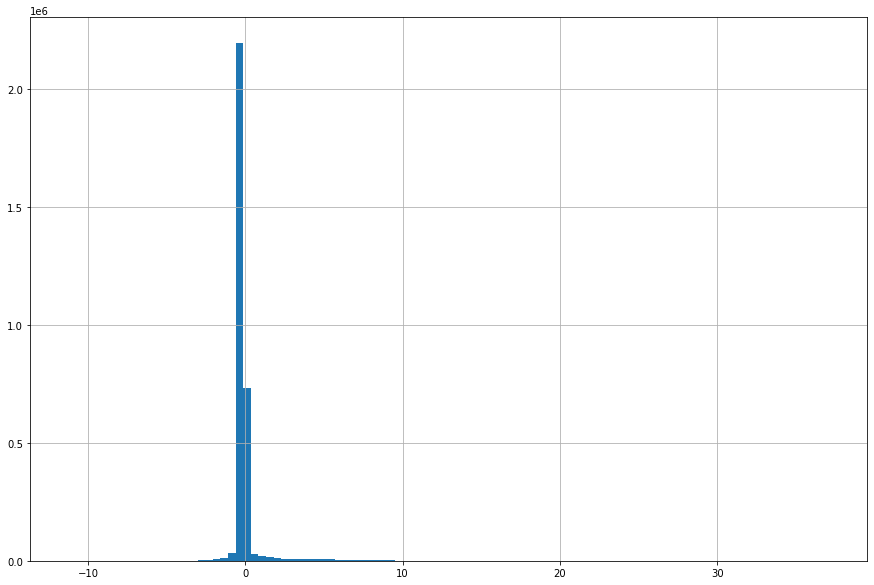

In [12]:
f = 'f_62'
train_df[f].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

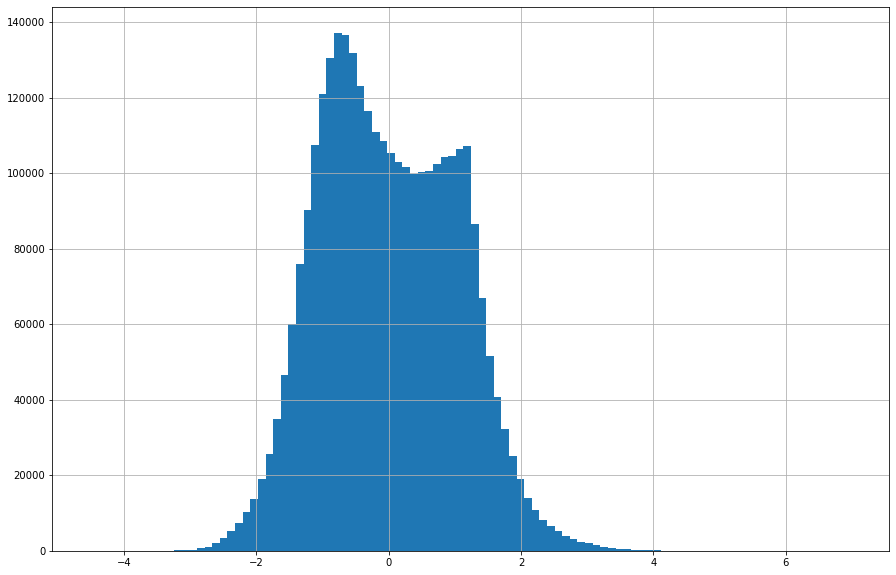

In [13]:
f = 'f_234'
train_df[f].hist(bins=100, figsize=(15, 10))

<AxesSubplot:>

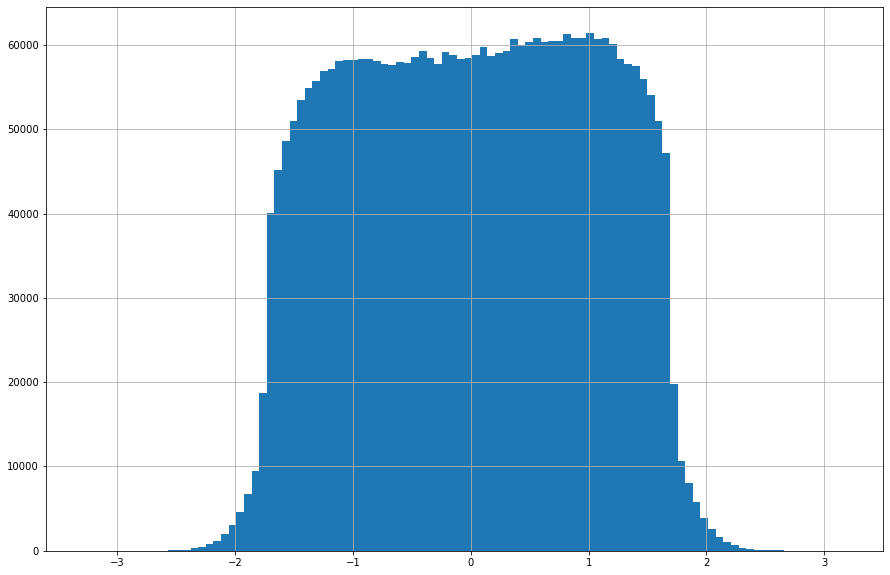

In [14]:
f = 'f_164'
train_df[f].hist(bins=100, figsize=(15, 10))

Some features look normal, but most have outliers, skewed distribution, and multiple modes. Probably the analysis of features one by one will bring a lot of value later in the competition, but we will not go deep into it in this notebook.

In [26]:
features = [f'f_{i}' for i in range(300)]
target = 'target'

<AxesSubplot:>

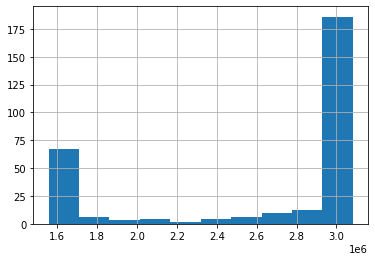

In [16]:
train_df[features].nunique().hist()

In [17]:
train_df[features].nunique()

f_0      3030032
f_1      1664323
f_2      3068705
f_3      3032287
f_4      3031259
          ...   
f_295    2859430
f_296    1617966
f_297    3068256
f_298    3003296
f_299    2865503
Length: 300, dtype: int64

All features have a lot of unique values, so they either float or have some added noise to hide the integer/categorical nature.  
上面的图，横坐标是unique的feature的数量（乘10的6次方个），纵坐标是unique的值的数量在对应范围内的f_i数量（一共有300个）

### 1.4 Features Interaction

We will do analysis on a smaller random 1% samle of the dataset to speed up the process.

In [18]:
sample_df = train_df.sample(frac=0.01)
sample_df

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
345526,152_3604,152,3604,0.244754,0.366266,-0.483125,0.554233,-1.074348,0.301427,0.082535,...,1.012368,0.911397,0.299952,0.206686,0.668256,-0.166837,-1.300802,-0.198609,0.139685,0.756385
1129474,530_1155,530,1155,1.245984,0.113702,-1.109055,0.461983,-0.359544,0.103589,2.596331,...,1.388689,-0.530800,0.274033,0.179717,-0.635080,0.715683,1.686374,-0.909468,-0.595321,0.465021
2685428,1081_393,1081,393,-0.571751,-1.097247,1.053310,0.058220,0.166322,-0.191269,-0.217888,...,1.211318,-2.752183,0.069909,-2.433642,2.119275,-0.226104,-0.431233,-2.838694,1.151225,-0.280624
1516964,684_2676,684,2676,0.523714,-0.563215,0.175616,-0.160374,-0.258489,-0.262289,1.591953,...,0.663737,-1.558989,-1.576394,-0.073091,-2.692919,-0.160542,0.651230,0.659923,-1.248532,-0.372191
834669,390_1543,390,1543,0.762081,-0.883161,-0.607496,1.440382,-0.311778,-0.540719,0.332947,...,0.201808,-0.878864,-0.662060,0.186339,-0.522283,-0.766810,-0.228429,-0.190445,-0.106709,-0.548122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300215,600_951,600,951,-0.062534,1.245793,0.230537,1.178228,-0.487673,-0.565108,-0.057128,...,-0.082740,1.729679,-0.704961,0.146568,1.371981,-0.595682,-3.023856,-0.096627,0.180471,-0.538585
802146,363_2695,363,2695,-1.486149,-0.451061,0.620580,-0.526547,-0.481466,-0.617109,-0.907916,...,1.630326,1.051839,-1.833488,0.440612,-3.678622,0.053363,-0.343178,0.032201,-1.665166,-0.871903
3003843,1179_1687,1179,1687,0.043405,0.485073,-1.484532,0.337484,-0.371267,0.062064,-1.501959,...,-0.473335,1.137661,-0.235338,-0.726445,0.319790,0.398265,2.188467,0.850376,0.596229,0.152471
900117,427_1717,427,1717,-0.647058,-3.061397,-1.347129,0.212244,-0.209163,-0.510902,-1.432211,...,-0.615252,-0.521945,-0.257172,-3.060675,-0.667816,-0.375558,0.973151,-0.432555,0.450175,-0.466858


In [19]:
correlation = sample_df[['target'] + features].corr()
correlation
# https://blog.csdn.net/qq_24509229/article/details/80349898
# https://vimsky.com/examples/usage/python-pandas-dataframe-corr.html

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
target,1.000000,0.007325,-0.018388,0.022396,-0.019222,0.006276,0.031960,-0.012613,-0.001533,0.017896,...,0.023970,0.004946,0.003590,0.006376,-0.008122,-0.020234,0.008199,-0.041049,-0.006566,0.003404
f_0,0.007325,1.000000,-0.075725,0.078066,-0.017045,0.004504,0.009576,-0.071636,-0.002529,0.014265,...,0.032324,0.001585,0.057677,0.009131,0.006469,0.014702,0.042244,0.013015,-0.002109,-0.006337
f_1,-0.018388,-0.075725,1.000000,-0.313570,0.264317,0.032890,0.058962,0.186956,-0.030081,-0.029924,...,-0.246956,-0.019667,0.124377,0.183966,-0.000197,0.096552,-0.014482,0.025560,0.058802,0.040194
f_2,0.022396,0.078066,-0.313570,1.000000,-0.406436,-0.199992,-0.001116,-0.136900,0.082316,0.125114,...,0.183552,-0.026378,-0.159910,-0.162390,0.004102,-0.293787,-0.003531,-0.016747,-0.101144,-0.263490
f_3,-0.019222,-0.017045,0.264317,-0.406436,1.000000,0.178467,0.003790,0.099577,-0.117937,-0.151871,...,-0.168269,-0.020296,0.271582,0.073835,-0.011327,0.353791,0.002587,0.024929,0.159112,0.232947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f_295,-0.020234,0.014702,0.096552,-0.293787,0.353791,0.565014,0.003293,0.005926,-0.181492,-0.358822,...,-0.106131,0.123084,0.248435,0.048238,0.024684,1.000000,0.022209,0.092423,0.042317,0.621730
f_296,0.008199,0.042244,-0.014482,-0.003531,0.002587,-0.008994,0.038370,0.018761,-0.007542,-0.029610,...,-0.192027,0.020137,-0.018888,0.006149,0.018208,0.022209,1.000000,0.098836,0.013839,-0.008269
f_297,-0.041049,0.013015,0.025560,-0.016747,0.024929,-0.014342,-0.200786,-0.050279,0.003975,-0.126814,...,-0.312135,0.300701,-0.116933,-0.008177,0.216482,0.092423,0.098836,1.000000,0.021797,-0.038321
f_298,-0.006566,-0.002109,0.058802,-0.101144,0.159112,0.016348,-0.004112,0.011988,-0.013038,-0.023439,...,-0.052430,0.005875,0.055007,0.017896,-0.002290,0.042317,0.013839,0.021797,1.000000,-0.005292


<AxesSubplot:>

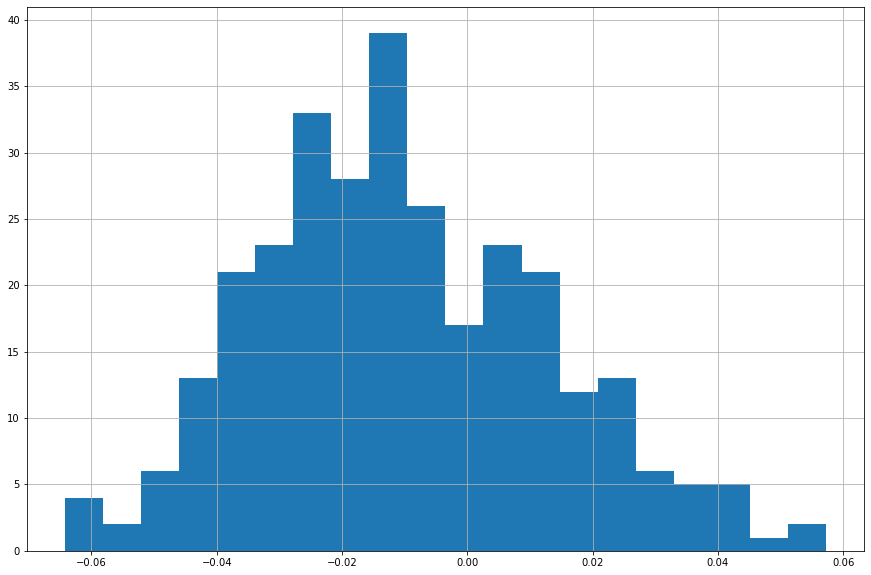

In [20]:
correlation['target'][1:].hist(bins=20, figsize=(15, 10))

There is no strong correlation between features and target. Let's look at the correlation of features with each other.

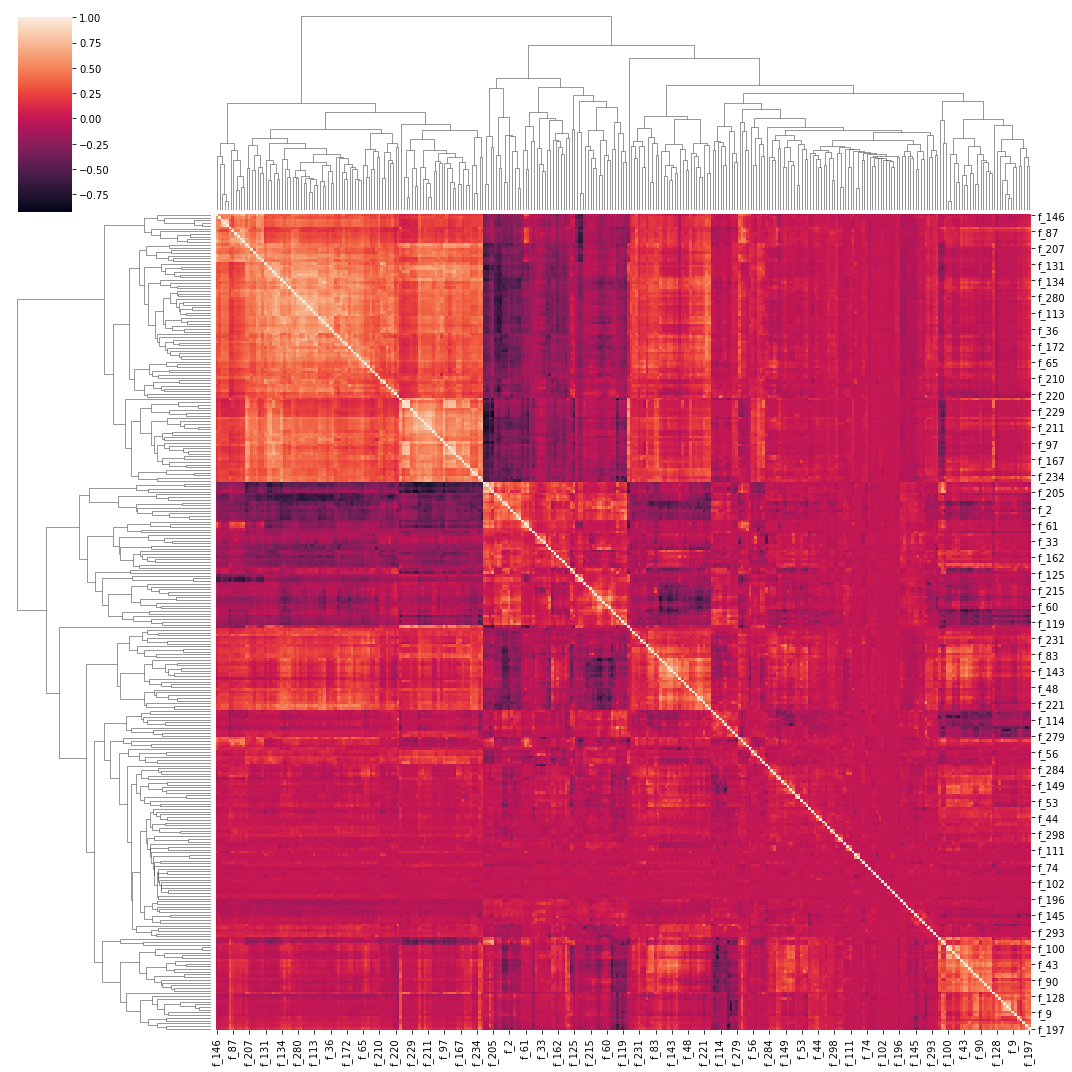

In [22]:
sns.clustermap(correlation, figsize=(15, 15))

There are definitely some clusters of highly correlated features that can be later analyzed together.

## model training (LGBMRegressor)
https://zhuanlan.zhihu.com/p/91395504

In [23]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

I will use LGBMRegressor to train a simple baseline model.



In [24]:
seed = 0
folds = 10
models = []

skf = StratifiedKFold(folds, shuffle=True, random_state=seed)

In [35]:
count = 0

In [33]:
for train_index, test_index in skf.split(train_df, train_df['investment_id']):
    train = train_df.iloc[train_index]
    valid = train_df.iloc[test_index]
    count = count + 1
    lgbm = LGBMRegressor(
        num_leaves=2 ** np.random.randint(3, 8),
        learning_rate = 10 ** (-np.random.uniform(0.1,2)),
        n_estimators = 1000,
        min_child_samples = 1000, 
        subsample=np.random.uniform(0.5,1.0), 
        subsample_freq=1,
        n_jobs= -1
    )

    lgbm.fit(train[features], train[target], eval_set = (valid[features], valid[target]), early_stopping_rounds = 10)
    models.append(lgbm)
    print("================", count)

c:\laptop4\APP\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.843708
[2]	valid_0's l2: 0.841974
[3]	valid_0's l2: 0.840719
[4]	valid_0's l2: 0.839722
[5]	valid_0's l2: 0.838982
[6]	valid_0's l2: 0.838405
[7]	valid_0's l2: 0.83792
[8]	valid_0's l2: 0.837463
[9]	valid_0's l2: 0.837071
[10]	valid_0's l2: 0.836688
[11]	valid_0's l2: 0.836385
[12]	valid_0's l2: 0.836111
[13]	valid_0's l2: 0.835872
[14]	valid_0's l2: 0.835603
[15]	valid_0's l2: 0.835326
[16]	valid_0's l2: 0.834986
[17]	valid_0's l2: 0.834818
[18]	valid_0's l2: 0.834599
[19]	valid_0's l2: 0.834403
[20]	valid_0's l2: 0.834118
[21]	valid_0's l2: 0.833892
[22]	valid_0's l2: 0.833705
[23]	valid_0's l2: 0.83347
[24]	valid_0's l2: 0.833281
[25]	valid_0's l2: 0.833099
[26]	valid_0's l2: 0.832927
[27]	valid_0's l2: 0.832761
[28]	valid_0's l2: 0.83262
[29]	valid_0's l2: 0.832461
[30]	valid_0's l2: 0.832312
[31]	valid_0's l2: 0.832157
[32]	valid_0's l2: 0.831996
[33]	valid_0's l2: 0.831844
[34]	valid_0's l2: 0.83175
[35]	valid_0's l2: 0.831641
[36]	valid_0's l2: 0.831495
[37]	

KeyboardInterrupt: 

In [42]:
from sklearn import metrics
acc = []
for train_index, test_index in skf.split(sample_df, sample_df['investment_id']):
    train = sample_df.iloc[train_index]
    valid = sample_df.iloc[test_index]
    count = count + 1
    lgbm = LGBMRegressor(
        num_leaves=2 ** np.random.randint(3, 8),
        learning_rate = 10 ** (-np.random.uniform(0.1,2)),
        n_estimators = 1000,
        min_child_samples = 1000, 
        subsample=np.random.uniform(0.5,1.0), 
        subsample_freq=1,
        n_jobs= -1
    )

    lgbm.fit(train[features], train[target], eval_set = (valid[features], valid[target]), early_stopping_rounds = 10)
    models.append(lgbm)
    acc.append(metrics.r2_score(valid[target], lgbm.predict(valid[features])))
    print("================", acc)

c:\laptop4\APP\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.894616
[2]	valid_0's l2: 0.892695
[3]	valid_0's l2: 0.89188
[4]	valid_0's l2: 0.894725
[5]	valid_0's l2: 0.897236
[6]	valid_0's l2: 0.897807
[7]	valid_0's l2: 0.902421
[8]	valid_0's l2: 0.905019
[9]	valid_0's l2: 0.905236
[10]	valid_0's l2: 0.905433
[11]	valid_0's l2: 0.907687
[12]	valid_0's l2: 0.912968
[13]	valid_0's l2: 0.914544
================ [0.003047673824082442]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.867376
[2]	valid_0's l2: 0.868051
[3]	valid_0's l2: 0.865028
[4]	valid_0's l2: 0.867797
[5]	valid_0's l2: 0.868208
[6]	valid_0's l2: 0.865504
[7]	valid_0's l2: 0.866878
[8]	valid_0's l2: 0.867132
[9]	valid_0's l2: 0.870028
[10]	valid_0's l2: 0.871145
[11]	valid_0's l2: 0.872086
[12]	valid_0's l2: 0.872837
[13]	valid_0's l2: 0.873244
================ [0.003047673824082442, 0.014048596150070813]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.819563
[2]	valid_0's l2: 0.819432
[3]	valid_0's l2: 0.821577
[4]	valid_0's l2: 0.826884
[5]	valid_0's l2: 0.829919
[6]	valid_0's l2: 0.832659
[7]	valid_0's l2: 0.837284
[8]	valid_0's l2: 0.842252
[9]	valid_0's l2: 0.844064
[10]	valid_0's l2: 0.849888
[11]	valid_0's l2: 0.849968
[12]	valid_0's l2: 0.856042
================ [0.003047673824082442, 0.014048596150070813, -0.0011523926382537297]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.88073
[2]	valid_0's l2: 0.878738
[3]	valid_0's l2: 0.87889
[4]	valid_0's l2: 0.876501
[5]	valid_0's l2: 0.876153
[6]	valid_0's l2: 0.8747
[7]	valid_0's l2: 0.874048
[8]	valid_0's l2: 0.87335
[9]	valid_0's l2: 0.872787
[10]	valid_0's l2: 0.873151
[11]	valid_0's l2: 0.874285
[12]	valid_0's l2: 0.875065
[13]	valid_0's l2: 0.875997
[14]	valid_0's l2: 0.877026
[15]	valid_0's l2: 0.876987
[16]	valid_0's l2: 0.877293
[17]	valid_0's l2: 0.877435
[18]	valid_0's l2: 0.878546
[19]	valid_0's l2: 0.87878
================ [0.003047673824082442, 0.014048596150070813, -0.0011523926382537297, 0.013269619450327452]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.865861
[2]	valid_0's l2: 0.865673
[3]	valid_0's l2: 0.865476
[4]	valid_0's l2: 0.865296
[5]	valid_0's l2: 0.865128
[6]	valid_0's l2: 0.864936
[7]	valid_0's l2: 0.864729
[8]	valid_0's l2: 0.864514
[9]	valid_0's l2: 0.864285
[10]	valid_0's l2: 0.864164
[11]	valid_0's l2: 0.863936
[12]	valid_0's l2: 0.863813
[13]	valid_0's l2: 0.86378
[14]	valid_0's l2: 0.863653
[15]	valid_0's l2: 0.863717
[16]	valid_0's l2: 0.863608
[17]	valid_0's l2: 0.86355
[18]	valid_0's l2: 0.863412
[19]	valid_0's l2: 0.863153
[20]	valid_0's l2: 0.862967
[21]	valid_0's l2: 0.8628
[22]	valid_0's l2: 0.862668
[23]	valid_0's l2: 0.862512
[24]	valid_0's l2: 0.862337
[25]	valid_0's l2: 0.862104
[26]	valid_0's l2: 0.861962
[27]	valid_0's l2: 0.861844
[28]	valid_0's l2: 0.86173
[29]	valid_0's l2: 0.861581
[30]	valid_0's l2: 0.861444
[31]	valid_0's l2: 0.861367
[32]	valid_0's l2: 0.86119
[33]	valid_0's l2: 0.861043
[34]	valid_0's l2: 0.8609
[35]	valid_0's l2: 0.86065
[36]	valid_0's l2: 0.860564
[37]	valid

c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.84557
[2]	valid_0's l2: 0.845033
[3]	valid_0's l2: 0.844177
[4]	valid_0's l2: 0.843708
[5]	valid_0's l2: 0.843418
[6]	valid_0's l2: 0.843059
[7]	valid_0's l2: 0.842366
[8]	valid_0's l2: 0.84198
[9]	valid_0's l2: 0.841841
[10]	valid_0's l2: 0.841207
[11]	valid_0's l2: 0.840989
[12]	valid_0's l2: 0.840867
[13]	valid_0's l2: 0.84036
[14]	valid_0's l2: 0.840108
[15]	valid_0's l2: 0.839616
[16]	valid_0's l2: 0.839236
[17]	valid_0's l2: 0.839179
[18]	valid_0's l2: 0.838988
[19]	valid_0's l2: 0.838878
[20]	valid_0's l2: 0.838803
[21]	valid_0's l2: 0.838714
[22]	valid_0's l2: 0.838555
[23]	valid_0's l2: 0.838151
[24]	valid_0's l2: 0.83785
[25]	valid_0's l2: 0.837747
[26]	valid_0's l2: 0.837744
[27]	valid_0's l2: 0.837644
[28]	valid_0's l2: 0.837167
[29]	valid_0's l2: 0.837134
[30]	valid_0's l2: 0.836973
[31]	valid_0's l2: 0.836824
[32]	valid_0's l2: 0.836663
[33]	valid_0's l2: 0.836539
[34]	valid_0's l2: 0.83631
[35]	valid_0's l2: 0.836307
[36]	valid_0's l2: 0.836015
[37]	v

c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.847049
[2]	valid_0's l2: 0.846022
[3]	valid_0's l2: 0.845757
[4]	valid_0's l2: 0.844604
[5]	valid_0's l2: 0.843852
[6]	valid_0's l2: 0.843833
[7]	valid_0's l2: 0.844077
[8]	valid_0's l2: 0.844144
[9]	valid_0's l2: 0.84407
[10]	valid_0's l2: 0.843756
[11]	valid_0's l2: 0.843864
[12]	valid_0's l2: 0.843791
[13]	valid_0's l2: 0.843846
[14]	valid_0's l2: 0.843303
[15]	valid_0's l2: 0.842921
[16]	valid_0's l2: 0.843233
[17]	valid_0's l2: 0.843265
[18]	valid_0's l2: 0.843729
[19]	valid_0's l2: 0.843898
[20]	valid_0's l2: 0.84376
[21]	valid_0's l2: 0.843775
[22]	valid_0's l2: 0.843888
[23]	valid_0's l2: 0.843979
[24]	valid_0's l2: 0.84468
[25]	valid_0's l2: 0.844954
================ [0.003047673824082442, 0.014048596150070813, -0.0011523926382537297, 0.013269619450327452, 0.010229197279668978, 0.013220110682420572, 0.0052127139208859585]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.81664
[2]	valid_0's l2: 0.814499
[3]	valid_0's l2: 0.817012
[4]	valid_0's l2: 0.818359
[5]	valid_0's l2: 0.821968
[6]	valid_0's l2: 0.828268
[7]	valid_0's l2: 0.830259
[8]	valid_0's l2: 0.834306
[9]	valid_0's l2: 0.832189
[10]	valid_0's l2: 0.832931
[11]	valid_0's l2: 0.834018
[12]	valid_0's l2: 0.836744
================ [0.003047673824082442, 0.014048596150070813, -0.0011523926382537297, 0.013269619450327452, 0.010229197279668978, 0.013220110682420572, 0.0052127139208859585, 0.0022724287076906213]


c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.831415
[2]	valid_0's l2: 0.830458
[3]	valid_0's l2: 0.830016
[4]	valid_0's l2: 0.829159
[5]	valid_0's l2: 0.828671
[6]	valid_0's l2: 0.82815
[7]	valid_0's l2: 0.827826
[8]	valid_0's l2: 0.827851
[9]	valid_0's l2: 0.827375
[10]	valid_0's l2: 0.826644
[11]	valid_0's l2: 0.826426
[12]	valid_0's l2: 0.825875
[13]	valid_0's l2: 0.82481
[14]	valid_0's l2: 0.824207
[15]	valid_0's l2: 0.823629
[16]	valid_0's l2: 0.823444
[17]	valid_0's l2: 0.823772
[18]	valid_0's l2: 0.823688
[19]	valid_0's l2: 0.823451
[20]	valid_0's l2: 0.823216
[21]	valid_0's l2: 0.823511
[22]	valid_0's l2: 0.823248
[23]	valid_0's l2: 0.823321
[24]	valid_0's l2: 0.823107
[25]	valid_0's l2: 0.822942
[26]	valid_0's l2: 0.82297
[27]	valid_0's l2: 0.822885
[28]	valid_0's l2: 0.822992
[29]	valid_0's l2: 0.823359
[30]	valid_0's l2: 0.823727
[31]	valid_0's l2: 0.823791
[32]	valid_0's l2: 0.824041
[33]	valid_0's l2: 0.824567
[34]	valid_0's l2: 0.824795
[35]	valid_0's l2: 0.824888
[36]	valid_0's l2: 0.82455
[37]	

c:\laptop4\APP\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.84136
[2]	valid_0's l2: 0.840196
[3]	valid_0's l2: 0.839088
[4]	valid_0's l2: 0.840172
[5]	valid_0's l2: 0.839047
[6]	valid_0's l2: 0.840954
[7]	valid_0's l2: 0.841998
[8]	valid_0's l2: 0.843844
[9]	valid_0's l2: 0.845436
[10]	valid_0's l2: 0.845257
[11]	valid_0's l2: 0.844449
[12]	valid_0's l2: 0.844809
[13]	valid_0's l2: 0.845295
[14]	valid_0's l2: 0.846176
[15]	valid_0's l2: 0.846687
================ [0.003047673824082442, 0.014048596150070813, -0.0011523926382537297, 0.013269619450327452, 0.010229197279668978, 0.013220110682420572, 0.0052127139208859585, 0.0022724287076906213, 0.010353532604168048, 0.006034912141698379]


In [43]:
acc

[0.003047673824082442,
 0.014048596150070813,
 -0.0011523926382537297,
 0.013269619450327452,
 0.010229197279668978,
 0.013220110682420572,
 0.0052127139208859585,
 0.0022724287076906213,
 0.010353532604168048,
 0.006034912141698379]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

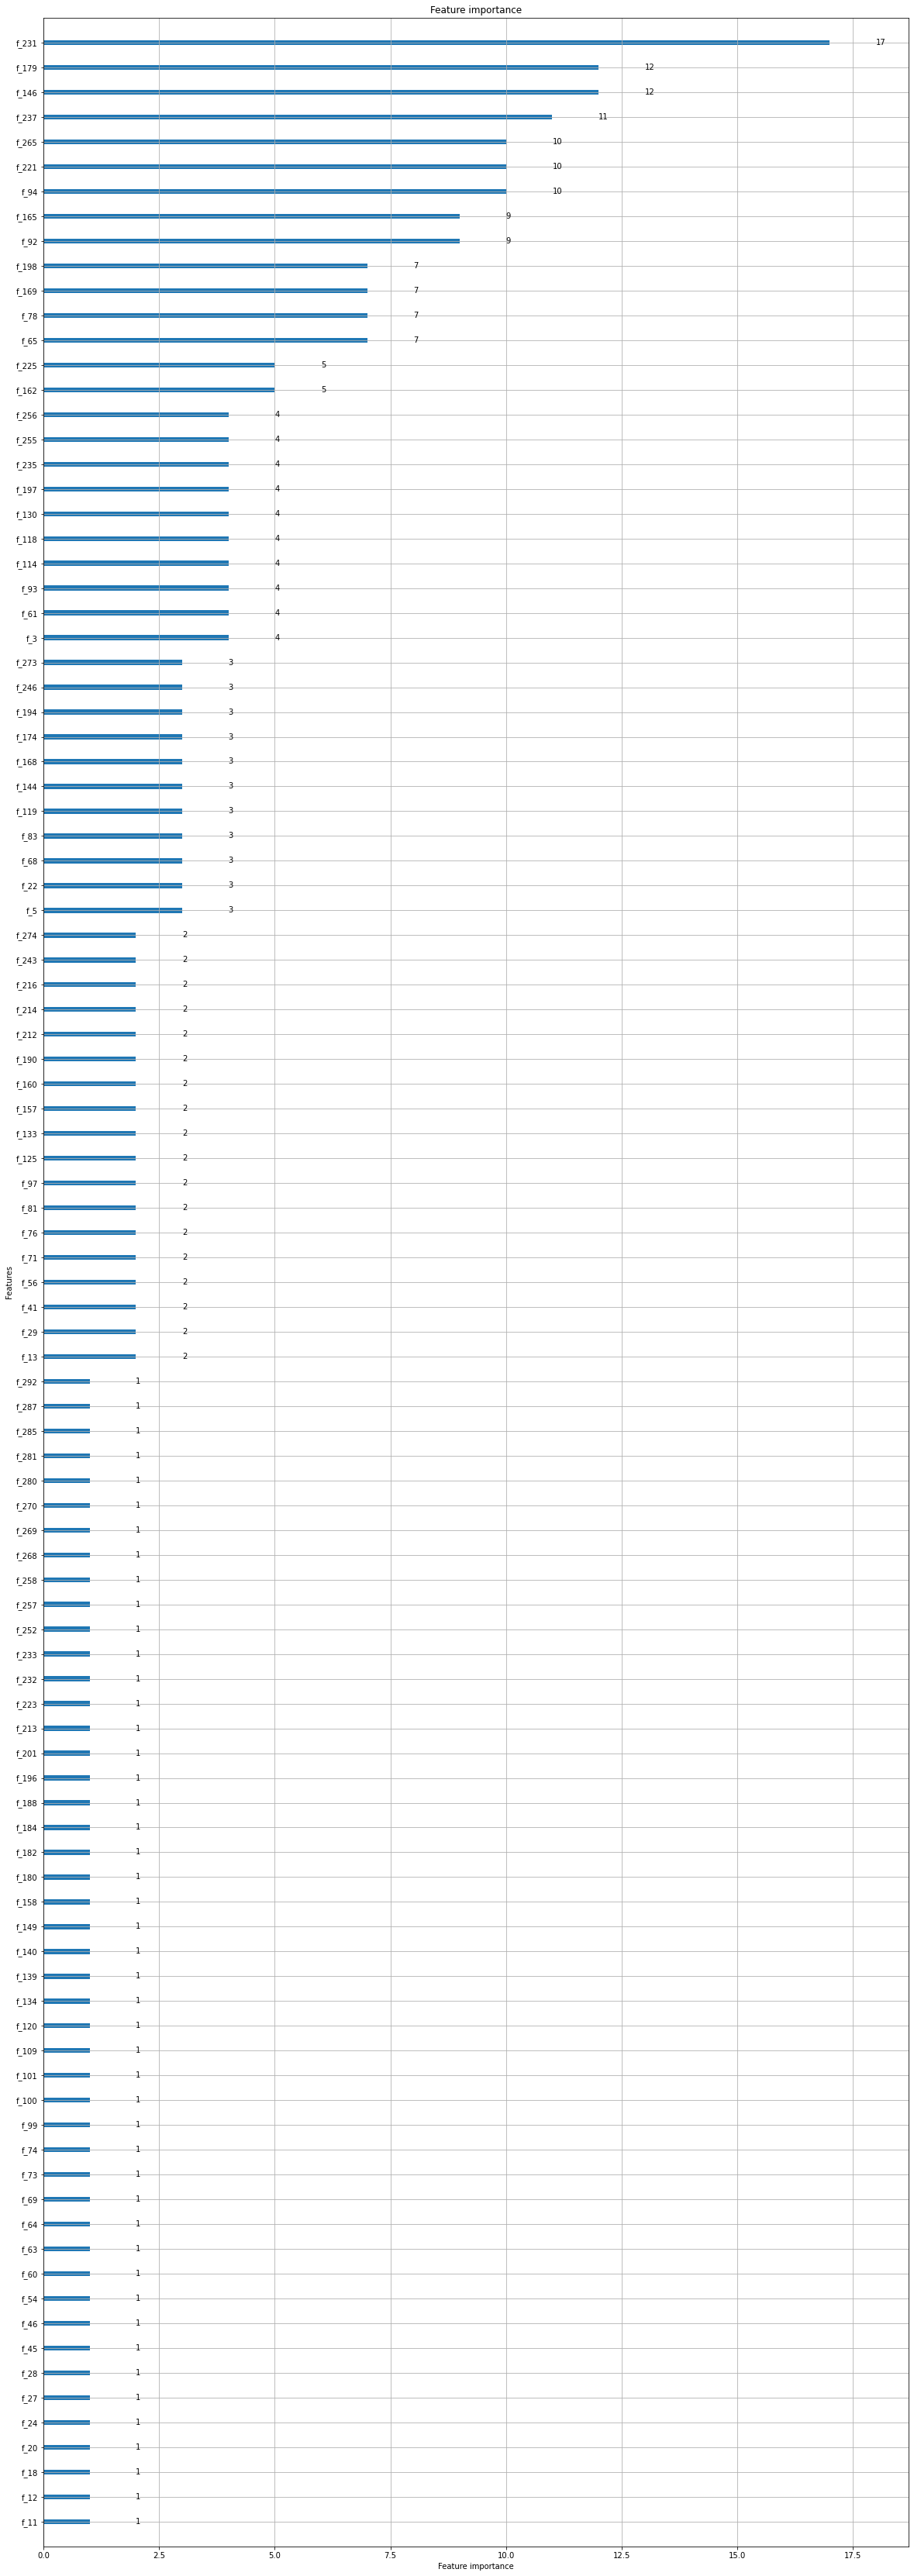

In [37]:
import lightgbm
lightgbm.plot_importance(lgbm, figsize = (20, 60))